In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import requests
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-2**<br>
**Profesora:** Paula Aguirre <br>

## Tarea 3: Limpieza, integración y análisis exploratorio de datos.

## Instrucciones Generales.

- Fecha de entrega: 26 de septiembre de 2022, 23:59.

- Vía de entrega: GitHub

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.

- La Tarea debe ser desarrollada en lenguaje de programación Python y en formato Jupyter Notebook.

- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.

- Se sugiere hacer consultas y comentarios sobre la Tarea a traves del Foro del curso en Canvas.


## Introducción.

Esta tarea tiene como objetivo crear y realizar un análisis descriptivo de una base de datos para el estudio de factores determinantes en el rendimiento escolar de los estudiantes de educación básica y media en Chile. En particular, se busca analizar la relación entre el rendimiento escolar, representado por el promedio general de notas de cada estudiante, y factores determinantes como el porcentaje de asistencia a clases, y la razón entre docentes y estudiantes de los establecimientos educacionales. 

Para este estudio, se utilizarán datos generados y publicados por el  Centro de Estudios del Ministerio de Educación de Chile: https://centroestudios.mineduc.cl/ <br>

El Centro de Estudios pone a disposición del público en general la plataforma Datos Abiertos para compartir información estadística en materia de educación, que incluye bases de datos de establecimientos educacionales, estudiantes y párvulos, docentes y asistentes de la educación, y sostenedores. Además, se entrega información georreferenciada.

Para el análisis planteado, se considerarán las siguientes fuentes de datos:

* **[BD1] Rendimiento académico por estudiante:** colección que agrupa datos para descagar información resumida del rendimiento desde el año 2002 al 2021.
https://datosabiertos.mineduc.cl/rendimiento-por-estudiante-2/

* **[BD2] Dotación docente por establecimiento:** 
https://datosabiertos.mineduc.cl/resumen-de-docentes-por-establecimiento/

* **[BD3] Resumen de matrícula por establecimiento:** 
https://datosabiertos.mineduc.cl/resumen-de-matricula-por-establecimiento-educacional/

* **[BD4] Directorio de Establecimientos Educacionales:** https://datosabiertos.mineduc.cl/directorio-de-establecimientos-educacionales/

* **[BD5]** Cartografía de comunas de Chile: capa vectorial disponible en la IDE Chile del Ministerio de Bienes Nacionales, https://www.ide.cl/.


## Parte I: Limpieza e integración de datos.

El primer objetivo para el análisis, es generar un conjunto de datos limpio, consistente en una única tabla con valores promedio  de NOTAS, ASISTENCIA, y RAZÓN DOCENTES/ESTUDIANTES para cada COMUNA del país. Para construir esta tabla, complete los siguientes puntos:

#### 1. Para ambos conjuntos de datos, descargue los archivos correspondientes al año 2021. Consulte la documentación asociada para identificar el contenido de cada uno.

Cada una de las bases de datos requiere un procesamiento previo al análisis. Aplique las operaciones necesarias para generar los conjuntos de datos limpios descritos en los siguientes puntos.


#### 2. Para [BD1]: a partir de los datos descargados, genere una base de datos [BD1_clean] resumida con la siguiente estructura:

| | COD_COMUNA |	NIVEL |	EDAD_ALU |	PROM_GRAL |	ASISTENCIA| SIT_FINAL|
|--- | --- | --- | --- |--- | --- |---|
|0| 	15101| 	media |	15 |	6.4 |	97| P|
|1| 	15101| 	media |	14 |	5.1 |	91|P|
|2| 	15101| 	media |	16 |	4.8 |	85|P|
|3| 	15101| 	media |	14 |	5.2 |	89|P|
|...| 	...| 	... |	... |	... |	...|...|

Esta base de datos resumida debe cumplir las siguientes características:
* Los datos corresponden sólo a estudiantes niños y jóvenes, se descartan los datos de estudiantes adultos.
* `NIVEL`: es una variable categórica que indica el nivel de enseñanza agrupado al cual pertenece cada estudiante, cuyos valores pueden ser [*media_ch*, *media_tp*, *básica*], donde *media_ch* corresponde a la educación media científico-humanista, y *media_tp* a la educación media técnico-profesional.
* `SIT_FINAL`:  es una variable categórica que indica la situación final de promoción al cierre del año escolar. Se conservan sólo los datos correspondientes a la situación Promovido/Reprobado.
* `PROM_GRAL, EDAD_ALU y PROM_GRAL` tienen los tipos de datos adecuados para aplicarles operaciones numéricas. 
* `COD_COMUNA, NIVEL, y SITUACION` son variables categóricas.
* El dataset no tiene valores nulos.


In [ ]:
# datos de rendimiento escolar
edu0=pd.read_csv('Rendimiento-2021/20220302_Rendimiento_2021_20220131_WEB.csv',delimiter=';')
edu=edu0.drop(columns=[ 'RBD', 'DGV_RBD', 'NOM_RBD','COD_PRO_RBD',  'NOM_COM_RBD', 'COD_DEPROV_RBD',
       'NOM_DEPROV_RBD','COD_DEPE', 'COD_DEPE2','COD_ENSE', 'COD_GRADO', 'LET_CUR', 'COD_JOR',
       'COD_TIP_CUR', 'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'FEC_NAC_ALU','COD_REG_ALU', 'COD_COM_ALU', 'NOM_COM_ALU', 'COD_RAMA',
       'COD_SEC', 'COD_ESPE','COD_MEN', 'SIT_FIN','NOM_REG_RBD_A','ESTADO_ESTAB','RURAL_RBD','AGNO',])

In [ ]:
edu=edu[edu['SIT_FIN_R'].isin(['P','R'])]


In [ ]:
#edu.drop(columns=['AGNO'],inplace=True)
edu=edu.rename(columns={'COD_REG_RBD':'REGION','SIT_FIN_R':'SIT_FINAL','COD_COM_RBD':'COMUNA'})

In [ ]:
edu=edu[edu['COD_ENSE2'].isin([2,5,7])]
edu=edu.rename(columns={'COD_ENSE2':'NIVEL'})

In [ ]:
edu['NIVEL']=edu['NIVEL'].map({5: 'media_ch', 7: 'media_tp',2:'basica'})

In [ ]:
edu['PROM_GRAL']=edu['PROM_GRAL'].str.replace(',','.')
edu['PROM_GRAL']=edu['PROM_GRAL'].astype('float')


In [ ]:
bd1_clean=edu.reset_index(drop=True) #opcional

bd1_clean.head()

,REGION,COMUNA,NIVEL,EDAD_ALU,PROM_GRAL,ASISTENCIA,SIT_FINAL
0,15,15101,media_tp,15,6.4,97,P
1,15,15101,media_tp,14,5.1,91,P
2,15,15101,media_tp,16,4.8,85,P
3,15,15101,media_tp,14,5.2,89,P
4,15,15101,media_tp,17,5.3,89,P


In [ ]:
bd1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959801 entries, 0 to 2959800
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   REGION      int64  
 1   COMUNA      int64  
 2   NIVEL       object 
 3   EDAD_ALU    object 
 4   PROM_GRAL   float64
 5   ASISTENCIA  int64  
 6   SIT_FINAL   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 158.1+ MB


#### 3. En base a **[BD1_clean]**, genere un nuevo dataframe que contenga lo valores promedio de `PROM_GRAL` y de `ASISTENCIA` de los alumnos de cada comuna.


In [ ]:
bd1_mean=bd1_clean.groupby(by='COMUNA',as_index=False).mean()
bd1_mean

<ipython-input-13-3f3753b7a9f4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bd1_mean=bd1_clean.groupby(by='COMUNA',as_index=False).mean()


,COMUNA,REGION,PROM_GRAL,ASISTENCIA
0,1101,1.0,6.060210,89.303994
1,1107,1.0,5.876609,88.953937
2,1401,1.0,5.997840,88.236585
3,1402,1.0,6.209449,92.129921
4,1403,1.0,5.804000,96.035000
...,...,...,...,...
340,16301,16.0,6.076510,91.697328
341,16302,16.0,5.949465,93.191917
342,16303,16.0,6.135093,92.328816
343,16304,16.0,6.149561,87.727729


#### 4. A partir de  **[BD2]** y **[BD3]**, genere un único dataframe **[BD2_3]** con la siguiente estructura:

| |ESTABLECIMIENTO |	COMUNA |	REGION |	DC_TOT |	MAT_TOTAL| 	RAZON_DOC_EST|
|---|---|---|---|---|---|---|
|0 |	LICEO POLITECNICO ARICA 	|15101 |	15 	|71 |	664| 	0.106928|
|1 |	PARVULARIO LAS ESPIGUITAS 	|15101 |	15 	|16 |	170| 	0.094118|
|2 |	ESC. PEDRO VICENTE GUTIERREZ TORRES| 	15101| 	15 |	28| 	470| 	0.059574|
|... |	...| 	...| 	... |	...| 	...| 	...|

La variable `RAZON_DOC_EST` se define como la razón entre docentes y estudiantes de cada establecimiento, calculada como
`RAZON_DOC_EST=DC_TOT/MAT_TOTAL`, donde `DC_TOT` es el total de docentes del establecimiento, y `MAT_TOT` es la matrícula total de alumnos.

Para ello, ud. debe:
* Unir las bases de datos mediante una columna común.
* Renombrar las columnas que sea necesario.
* Eliminar registros de establecimientos con matrícula igual a cero.
* Crear las nuevas columnas que se requiera.
* Eliminar columnas innecesarias.
* Eliminar registros con datos nulos.
 

In [ ]:
b2=pd.read_csv('Dotacion_docente_2021.csv',delimiter=';')
b2=b2[['NOM_RBD','COD_COM_RBD','DC_TOT']]
b2.head()

,NOM_RBD,COD_COM_RBD,DC_TOT
0,LICEO POLITECNICO ARICA,15101,71
1,PARVULARIO LAS ESPIGUITAS,15101,16
2,ESC. PEDRO VICENTE GUTIERREZ TORRES,15101,28
3,LICEO OCTAVIO PALMA PEREZ,15101,64
4,JOVINA NARANJO FERNANDEZ,15101,70


In [ ]:
bd3=pd.read_csv('Resumen_Matricula_EE_Oficial_2021.csv',delimiter=';')
bd3=bd3[['COD_REG_RBD','NOM_RBD','COD_COM_RBD','MAT_TOTAL']]
bd3.head()

,COD_REG_RBD,NOM_RBD,COD_COM_RBD,MAT_TOTAL
0,15,LICEO POLITECNICO ARICA,15101,664
1,15,PARVULARIO LAS ESPIGUITAS,15101,170
2,15,ESC. PEDRO VICENTE GUTIERREZ TORRES,15101,470
3,15,LICEO OCTAVIO PALMA PEREZ,15101,974
4,15,JOVINA NARANJO FERNANDEZ,15101,818


In [ ]:
bd2_3=b2.merge(bd3,on=['NOM_RBD'],how='inner')
bd2_3=bd2_3[bd2_3['MAT_TOTAL']>0]

In [ ]:
bd2_3['RAZON_DOC_EST']=bd2_3['DC_TOT']/bd2_3['MAT_TOTAL']
bd2_3=bd2_3[['NOM_RBD','COD_COM_RBD_x','COD_REG_RBD','DC_TOT','MAT_TOTAL','RAZON_DOC_EST']]

In [ ]:
bd2_3.rename(columns={'NOM_RBD':'ESTABLECIMIENTO','COD_COM_RBD_x':'COMUNA','COD_REG_RBD':'REGION'},inplace=True)
bd2_3.head()

,ESTABLECIMIENTO,COMUNA,REGION,DC_TOT,MAT_TOTAL,RAZON_DOC_EST
0,LICEO POLITECNICO ARICA,15101,15,71,664,0.106928
1,PARVULARIO LAS ESPIGUITAS,15101,15,16,170,0.094118
2,ESC. PEDRO VICENTE GUTIERREZ TORRES,15101,15,28,470,0.059574
3,LICEO OCTAVIO PALMA PEREZ,15101,15,64,974,0.065708
4,JOVINA NARANJO FERNANDEZ,15101,15,70,818,0.085575


#### 5.  En base a **[BD2_3]**, genere un dataframe resumido que contenga el promedio de la razón DOCENTE/ESTUDIANTES para todos los establecimientos de cada comuna.

In [ ]:
bd2_3_mean=bd2_3.groupby(by='COMUNA',as_index=False).mean()
bd2_3_mean

<ipython-input-19-a8c9aa76d2af>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bd2_3_mean=bd2_3.groupby(by='COMUNA',as_index=False).mean()


,COMUNA,REGION,DC_TOT,MAT_TOTAL,RAZON_DOC_EST
0,1101,2.397351,25.966887,388.960265,0.196604
1,1107,2.321429,33.714286,731.410714,0.053030
2,1401,1.000000,20.833333,296.833333,0.122446
3,1402,3.166667,4.500000,93.333333,0.575896
4,1403,1.000000,5.400000,43.200000,0.567564
...,...,...,...,...,...
339,16301,12.887097,27.161290,368.338710,0.300413
340,16302,13.550000,13.325000,215.875000,0.140702
341,16303,16.000000,19.818182,151.363636,0.160520
342,16304,16.000000,20.166667,148.000000,0.286362


In [ ]:
bd2_3_mean.to_csv('RazonDocentesMunicipios.csv',index=False)

#### 6. Genere el dataframe final para el análisis: una única tabla con valores promedio  de NOTAS, ASISTENCIA, y RAZÓN DOCENTES/ESTUDIANTES para cada COMUNA del país.

In [ ]:
df_final=bd2_3_mean.merge(bd1_mean,on='COMUNA',how='inner')
df_final

,COMUNA,REGION_x,DC_TOT,MAT_TOTAL,RAZON_DOC_EST,REGION_y,PROM_GRAL,ASISTENCIA
0,1101,2.397351,25.966887,388.960265,0.196604,1.0,6.060210,89.303994
1,1107,2.321429,33.714286,731.410714,0.053030,1.0,5.876609,88.953937
2,1401,1.000000,20.833333,296.833333,0.122446,1.0,5.997840,88.236585
3,1402,3.166667,4.500000,93.333333,0.575896,1.0,6.209449,92.129921
4,1403,1.000000,5.400000,43.200000,0.567564,1.0,5.804000,96.035000
...,...,...,...,...,...,...,...,...
339,16301,12.887097,27.161290,368.338710,0.300413,16.0,6.076510,91.697328
340,16302,13.550000,13.325000,215.875000,0.140702,16.0,5.949465,93.191917
341,16303,16.000000,19.818182,151.363636,0.160520,16.0,6.135093,92.328816
342,16304,16.000000,20.166667,148.000000,0.286362,16.0,6.149561,87.727729


In [ ]:
df_final.drop(columns=['REGION_x'],inplace=True)
df_final.rename(columns={'REGION_x':'REGION'},inplace=True)
df_final

,COMUNA,DC_TOT,MAT_TOTAL,RAZON_DOC_EST,REGION_y,PROM_GRAL,ASISTENCIA
0,1101,25.966887,388.960265,0.196604,1.0,6.060210,89.303994
1,1107,33.714286,731.410714,0.053030,1.0,5.876609,88.953937
2,1401,20.833333,296.833333,0.122446,1.0,5.997840,88.236585
3,1402,4.500000,93.333333,0.575896,1.0,6.209449,92.129921
4,1403,5.400000,43.200000,0.567564,1.0,5.804000,96.035000
...,...,...,...,...,...,...,...
339,16301,27.161290,368.338710,0.300413,16.0,6.076510,91.697328
340,16302,13.325000,215.875000,0.140702,16.0,5.949465,93.191917
341,16303,19.818182,151.363636,0.160520,16.0,6.135093,92.328816
342,16304,20.166667,148.000000,0.286362,16.0,6.149561,87.727729


#### 7. A partir de [BD4], genere un GeoDataFrame con la ubicación de los establecimientos educacionales de Chile. 

In [ ]:
import geopandas as gpd

bd4=pd.read_csv('Directorio_Oficial_EE_2021.csv',delimiter=';')
bd4=bd4[['RBD','NOM_RBD','LATITUD', 'LONGITUD']]
bd4=bd4[(bd4['LONGITUD']!=' ') & (bd4['LATITUD']!=' ')]
bd4['LATITUD']=bd4['LATITUD'].str.replace(',','.').str.strip().astype('float')
bd4['LONGITUD']=bd4['LONGITUD'].str.replace(',','.').str.strip().astype('float')

In [ ]:
bd4=gpd.GeoDataFrame(bd4,geometry=gpd.points_from_xy(bd4.LONGITUD,bd4.LATITUD),crs=4326)
bd4

,RBD,NOM_RBD,LATITUD,LONGITUD,geometry
0,1,LICEO POLITECNICO ARICA,-18.487200,-70.295212,POINT (-70.29521 -18.48720)
1,2,PARVULARIO LAS ESPIGUITAS,-18.469862,-70.302757,POINT (-70.30276 -18.46986)
2,3,ESC. PEDRO VICENTE GUTIERREZ TORRES,-18.503580,-70.260826,POINT (-70.26083 -18.50358)
3,4,LICEO OCTAVIO PALMA PEREZ,-18.474239,-70.308273,POINT (-70.30827 -18.47424)
4,5,JOVINA NARANJO FERNANDEZ,-18.476900,-70.313454,POINT (-70.31345 -18.47690)
...,...,...,...,...,...
16463,41862,ESCUELA ESPECIAL DE LENGUAJE CASTILLO DEL VALLE,-41.457120,-72.905070,POINT (-72.90507 -41.45712)
16475,41884,JARDIN INFANTIL MAHAY MONTESSORI,-70.545080,-29.222982,POINT (-29.22298 -70.54508)
16479,41899,COLEGIO SAN JORGE,-37.282908,-72.708795,POINT (-72.70880 -37.28291)
16485,41911,ESCUELA DE LENGUAJE RUCAKUYÉN,-36.788454,-73.107571,POINT (-73.10757 -36.78845)


## Parte II: Análisis exploratorio de datos.

 A partir de las bases de datos [BD1_clean] y/o [BD_23], analice y responda las preguntas enunciadas a continuación. Para cada pregunta,  debe incluir **al menos un análisis estadístico y un gráfico** que sustenten su respuesta, y **una conclusión o comentario** a partir de dichos análisis. Justifique claramente todos sus análisis y conclusiones.

#### 8. Utilice el GeoDataframe generado en el punto 7. y [BD5] para generar un mapa de los establecimientos educacionales en Chile. 



In [ ]:
bd5=gpd.read_file('Comunas/comunas.shp').to_crs(4326)

In [ ]:
bd5=bd5[~bd5['Comuna'].isin(['Isla de Pascua','Juan Fernández'])]

/Users/paguirre/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


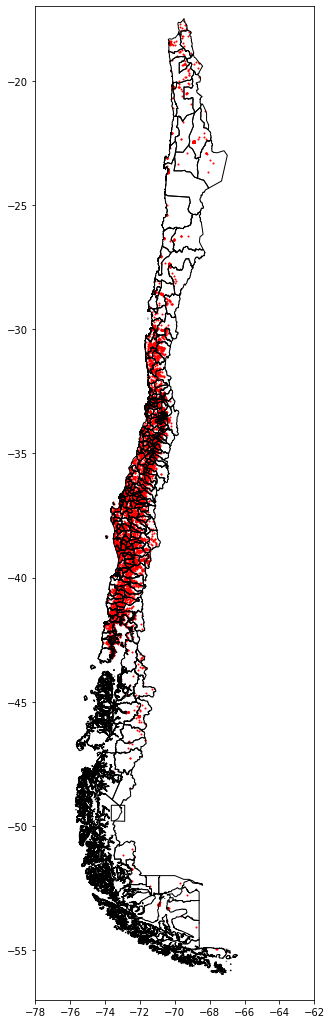

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,20))

bd5.boundary.plot(ax=ax,color='k',lw=1)
bd4.plot('.',ax=ax,color='red',markersize=1);
ax.set_ylim(-57,-17);
ax.set_xlim(-78,-62);

#### 9. ¿Cómo son las distribuciones de notas y asistencia para los estudiantes de los establecimientos educacionales chilenos? 



<AxesSubplot:xlabel='ASISTENCIA', ylabel='Count'>

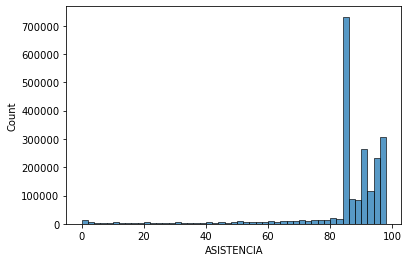

In [ ]:
import seaborn as sns

sns.histplot(data=bd1_clean,x='ASISTENCIA',bins=np.arange(0,100,2))

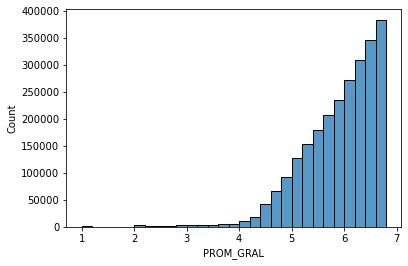

In [ ]:
sns.histplot(data=bd1_clean,x='PROM_GRAL',bins=np.arange(1,7,0.2));

#### 10. ¿Existe alguna diferencia entre la ASISTENCIA y PROM_GRAL de estudiante de educación media científico-humanista y técnico-profesional?


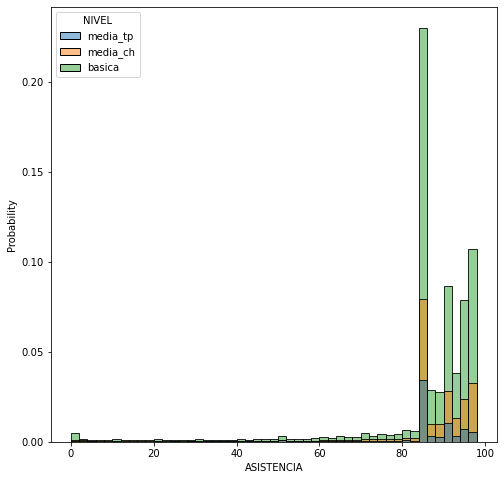

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data=bd1_clean,x='ASISTENCIA',bins=np.arange(0,100,2),hue='NIVEL',stat='probability');

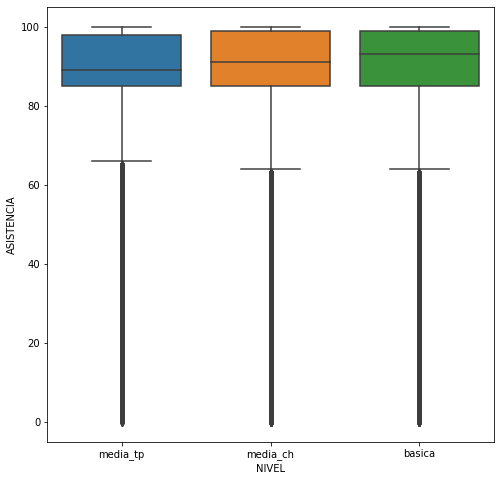

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=bd1_clean,y='ASISTENCIA',x='NIVEL');

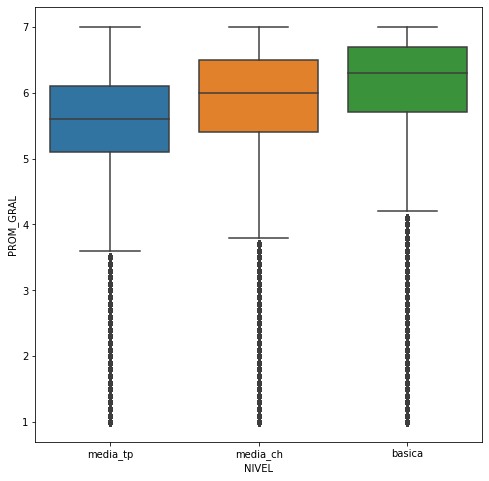

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=bd1_clean,y='PROM_GRAL',x='NIVEL');

#### 11. ¿Cómo varía la ASISTENCIA de los estudiantes de acuerdo a su edad? ¿Hay algún patrón detectable?


In [ ]:
bd1_clean=bd1_clean[bd1_clean['EDAD_ALU']!=' ']
bd1_clean['EDAD_ALU']=bd1_clean['EDAD_ALU'].astype('float')

<ipython-input-104-181062e17140>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd1_clean['EDAD_ALU']=bd1_clean['EDAD_ALU'].astype('float')


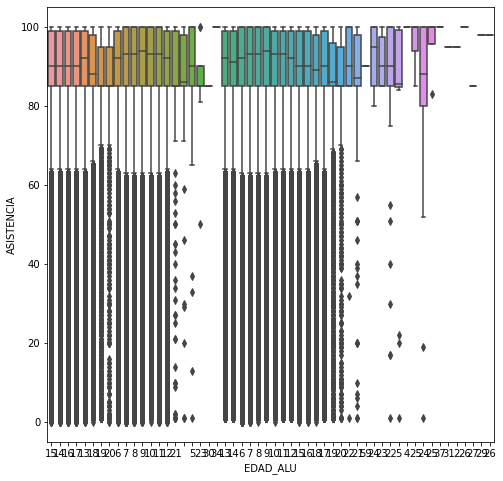

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=bd1_clean,y='ASISTENCIA',x='EDAD_ALU');

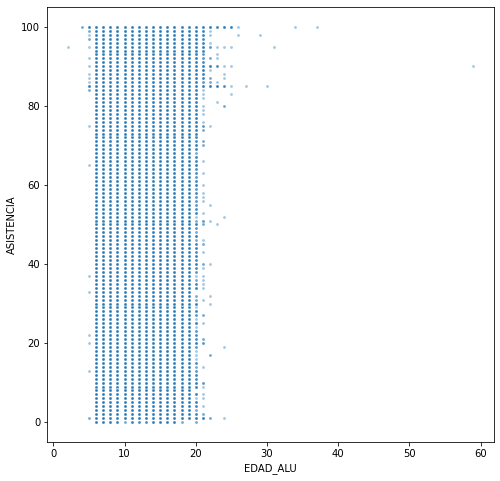

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=bd1_clean,y='ASISTENCIA',x='EDAD_ALU',marker='.',alpha=0.4);

No se aprecia relación.

#### 12. ¿Son consistentes los datos la situación final de cada estudiante con sus datos de ASISTENCIA y PROM_GRAL? ¿Puede identificar alguna anomalía en los datos? En caso que su respuesta sea afirmativa, proponga cómo tratar dichos datos anómalos.


<AxesSubplot:xlabel='PROM_GRAL', ylabel='Count'>

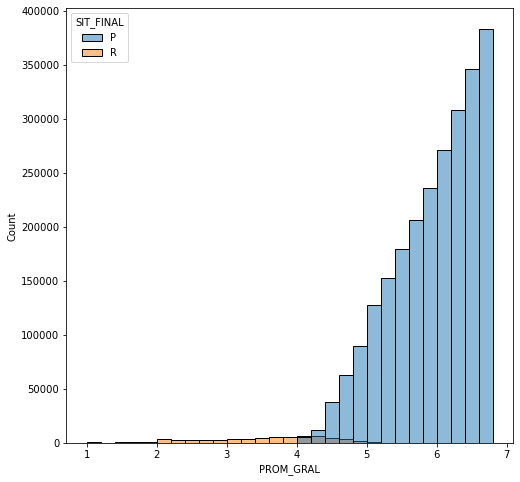

In [ ]:
plt.figure(figsize=(8,8))

sns.histplot(data=bd1_clean,x='PROM_GRAL',hue='SIT_FINAL',bins=np.arange(1,7,0.2))

In [ ]:
bd1_clean[(bd1_clean['SIT_FINAL']=='P') & (bd1_clean['PROM_GRAL']<4.0)]

,REGION,COMUNA,NIVEL,EDAD_ALU,PROM_GRAL,ASISTENCIA,SIT_FINAL
176708,4,4102,basica,7.0,2.6,85,P
176741,4,4102,basica,8.0,2.4,85,P
176780,4,4102,basica,7.0,2.3,85,P
176893,4,4102,basica,10.0,3.6,85,P
244849,5,5304,basica,8.0,3.8,52,P
...,...,...,...,...,...,...,...
2849514,13,13201,basica,13.0,3.6,61,P
2850046,13,13403,basica,12.0,3.6,85,P
2850059,13,13403,basica,12.0,3.8,85,P
2876184,13,13302,media_ch,18.0,3.9,50,P


In [ ]:
rep=bd1_clean[(bd1_clean['SIT_FINAL']=='R') & (bd1_clean['PROM_GRAL']>4.0)]
rep

,REGION,COMUNA,NIVEL,EDAD_ALU,PROM_GRAL,ASISTENCIA,SIT_FINAL
1931,15,15101,media_ch,16.0,4.5,85,R
1974,15,15101,media_ch,16.0,4.1,85,R
2183,15,15101,media_tp,16.0,4.3,85,R
2613,15,15101,media_tp,17.0,4.1,85,R
2618,15,15101,media_tp,16.0,4.4,85,R
...,...,...,...,...,...,...,...
2957598,8,8112,basica,11.0,4.3,75,R
2957620,8,8112,basica,12.0,4.2,80,R
2957631,8,8112,basica,12.0,4.2,75,R
2957849,8,8112,media_ch,16.0,4.1,81,R


<AxesSubplot:xlabel='ASISTENCIA', ylabel='Count'>

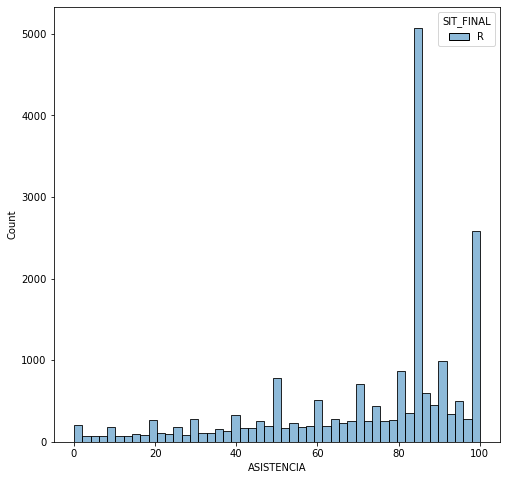

In [ ]:
plt.figure(figsize=(8,8))

sns.histplot(data=rep,x='ASISTENCIA',hue='SIT_FINAL')

Hya situaciones anómales: reprobados con nota mayor a 4.0, y promovidos con nota menor a 4.0. Algunos reprobados con <4.0 tienen baja asistencia, lo cual podría ser una explicación, pero la mayoría de ellos tiene asistencia suficiente para haber sido promovidos, por lo que su situación es anómala.

#### 13. ¿Cuántos establecimientos educacionales y estudiantes matriculados hay en total en Chile, y cómo se distribuyen por región? ¿Hay coherencia entre la distribución de estudiantes y establecimientos, o identifica alguna aparente inequidad?


#### 14. ¿Cómo varía la tasa de docentes/estudiantes por región y por tipo de educación? ¿Hay algún patrón detectable?


<AxesSubplot:xlabel='REGION', ylabel='RAZON_DOC_EST'>

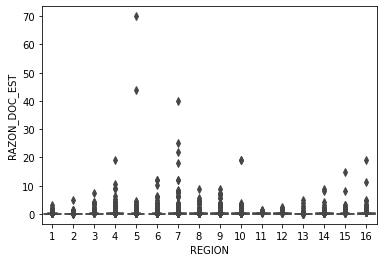

In [ ]:
sns.boxplot(data=bd2_3,y='RAZON_DOC_EST',x='REGION_y')


In [ ]:
bd2_3

,ESTABLECIMIENTO,COMUNA,REGION,DC_TOT,MAT_TOTAL,RAZON_DOC_EST
0,LICEO POLITECNICO ARICA,15101,15,71,664,0.106928
1,PARVULARIO LAS ESPIGUITAS,15101,15,16,170,0.094118
2,ESC. PEDRO VICENTE GUTIERREZ TORRES,15101,15,28,470,0.059574
3,LICEO OCTAVIO PALMA PEREZ,15101,15,64,974,0.065708
4,JOVINA NARANJO FERNANDEZ,15101,15,70,818,0.085575
...,...,...,...,...,...,...
22985,COLEGIO BOSTON COLLEGE LAGUNA DEL SOL,13604,13,15,235,0.063830
22986,CEIA INAPEWMA LA SERENA,4101,4,9,12,0.750000
22993,ESCUELA BASICA COLEGIO TRIGALES DEL MAIPO,13201,13,14,161,0.086957
22995,ESCUELA ESPECIAL DE LENGUAJE CASTILLO DEL VALLE,10101,10,1,16,0.062500


<AxesSubplot:xlabel='REGION_y', ylabel='RAZON_DOC_EST'>

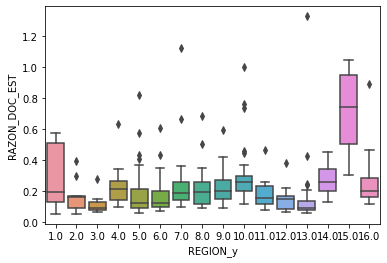

In [ ]:
sns.boxplot(data=df_final,y='RAZON_DOC_EST',x='REGION_y')

#### 15. ¿Puede identificar alguna correlación entre el rendimiento escolar (PROM_GRAL), la ASISTENCIA, y la RAZON_DOC_EST para los escolares chileno (no-adultos)? ¿Cree que es posible realizar este análisis, y plantear algún modelo (general o parcial) a partir de los datos utilizados? Justifique y argumente claramente su respuesta.


<Figure size 576x576 with 0 Axes>

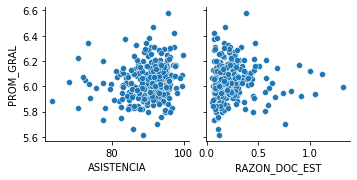

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df_final,y_vars=['PROM_GRAL'],x_vars=['ASISTENCIA','RAZON_DOC_EST']);

<AxesSubplot:>

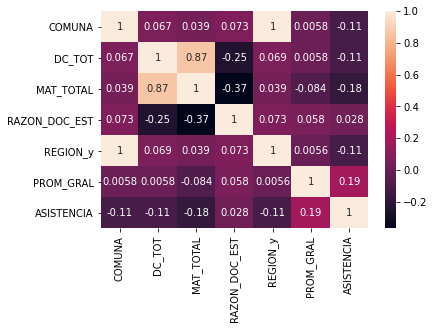

In [ ]:
sns.heatmap(df_final.corr(),annot=True)

<ipython-input-135-061784670c53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bd1_clean.corr(),annot=True)


<AxesSubplot:>

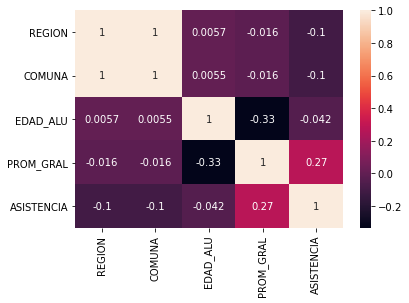

In [ ]:
sns.heatmap(bd1_clean.corr(),annot=True)